In [1]:
%matplotlib inline

In [2]:
path="data/dogscats/"

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils;reload(utils)
from utils import plots

Using TensorFlow backend.


In [5]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16

In [6]:
#Vgg16 model showing how to use the class to view imagenet predictions with different categories.
vgg = Vgg16()
batches = vgg.get_batches(path+'train',batch_size=4)

Found 23000 images belonging to 2 classes.


In [7]:
next(batches)

(array([[[[  51.,   53.,   48., ...,   33.,   29.,   28.],
          [  49.,   52.,   47., ...,   32.,   27.,   27.],
          [  51.,   53.,   48., ...,   26.,   28.,   25.],
          ..., 
          [  74.,   81.,   81., ...,   56.,   57.,   57.],
          [  70.,   74.,   74., ...,   57.,   58.,   54.],
          [  71.,   75.,   70., ...,   56.,   57.,   53.]],
 
         [[  41.,   43.,   38., ...,   32.,   28.,   27.],
          [  39.,   42.,   37., ...,   31.,   26.,   26.],
          [  41.,   43.,   38., ...,   25.,   27.,   24.],
          ..., 
          [  61.,   68.,   68., ...,   49.,   50.,   50.],
          [  60.,   64.,   64., ...,   50.,   51.,   47.],
          [  61.,   65.,   60., ...,   49.,   50.,   46.]],
 
         [[  49.,   51.,   46., ...,   38.,   34.,   33.],
          [  47.,   50.,   45., ...,   37.,   32.,   32.],
          [  50.,   52.,   47., ...,   31.,   33.,   30.],
          ..., 
          [  71.,   78.,   78., ...,   57.,   58.,   58.],
  

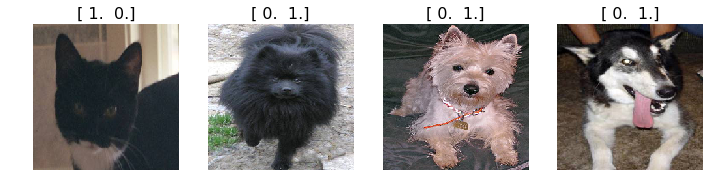

In [8]:
img,labels = next(batches)
plots(img,titles=labels)

In [9]:
vgg.predict(img,True)

(array([ 0.0459,  0.2701,  0.4346,  0.1999], dtype=float32),
 array([568, 256, 153, 264]),
 [u'fur_coat', u'Newfoundland', u'Maltese_dog', u'Cardigan'])

In [10]:
#Vgg class to finetune a model according to your data classification.
batch_size = 64
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batch = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
vgg.finetune(batches)


In [12]:
vgg.fit(batches,val_batch,nb_epoch=1)


Epoch 1/1
23000/23000 [==============================] - 120628s - loss: 0.4402 - acc: 0.8701 - val_loss: 0.2351 - val_acc: 0.9175
